# Phase 1

In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 

# models 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

from sklearn.metrics import silhouette_score


In [2]:
AliPC = True
KianaPC = False
path=""

if AliPC:
  path = r"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\input"
else:
  path = r"/content/drive/MyDrive/dataset"

os.chdir(path)

images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
    for file in files:
            images.append(file.name)

In [3]:
if KianaPC:
    from google.colab import drive
    drive.mount('/content/drive')

In [4]:
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input

In [5]:
# load the model first and pass as an argument
# model = VGG16()
# model = VGG19()
# model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx)
    return features.flatten()

In [6]:
import pickle
import numpy as np

# Define the path to the dataset pickle file
if AliPC:
    pkl_Path = r"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\dataset.pkl"
else:
    pkl_Path = r"/content/drive/MyDrive/dataset.pkl"

data = {}

# loop through each image in the dataset
for image in images:
    try:
        feat = extract_features(image, model) 
        data[image] = feat  
        print(image)  
    except Exception as ex: # if something fails, save the extracted features as a pickle file (optional)
        with open(pkl_Path, 'wb') as file:
            pickle.dump(data, file)
            print(f"Exception: {ex}")

with open(pkl_Path, 'wb') as file:
    pickle.dump(data, file)

filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))
# feat = feat.reshape(len(images), -1)
X = feat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
subject01.centerlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
subject01.glasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
subject01.happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
subject01.leftlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
subject01.noglasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject01.normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject01.rightlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject01.sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject01.sleepy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject01.surprised
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
subject01.wink
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject02.centerlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
subject02.glasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject02.happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
subject02.leftlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
subject02.noglasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
subject02.normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
su

In [7]:
import os
import numpy as np
import pickle
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_resnet
from keras.applications.vgg19 import VGG19, preprocess_input as preprocess_vgg19


model = VGG19()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
# Load the pre-trained models
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model_vgg19 = VGG19(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features from an image file using ResNet50 model
def extract_features_resnet(file):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_resnet(reshaped_img)
    features = model_resnet.predict(imgx)
    return features.flatten()

# Function to extract features from an image file using VGG19 model
def extract_features_vgg19(file):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_vgg19(reshaped_img)
    features = model_vgg19.predict(imgx)
    return features.flatten()

# Directory containing the images
image_dir = path

# Initialize dictionaries to store filenames and their corresponding feature vectors
data_resnet = {}
data_vgg19 = {}

# Loop through each image in the dataset
for image_file in os.listdir(image_dir):
    try:
        # Get the full path of the image file
        image_path = os.path.join(image_dir, image_file)
        # Extract features from the image using ResNet50 and VGG19 models
        feat_resnet = extract_features_resnet(image_path)
        feat_vgg19 = extract_features_vgg19(image_path)
        # Store the filename and its corresponding feature vector in the dictionaries
        data_resnet[image_file] = feat_resnet
        data_vgg19[image_file] = feat_vgg19
        print(f"Extracted features for: {image_file}")
    except Exception as ex:
        # If an exception occurs, you can handle it here
        print(f"Exception occurred for {image_file}: {ex}")

# Save the dictionaries containing image filenames and their feature vectors as pickle files (optional)
pkl_path_resnet = "E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\features_resnet.pkl"
pkl_path_vgg19 = "E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\features_vgg19.pkl"
with open(pkl_path_resnet, 'wb') as file_resnet:
    pickle.dump(data_resnet, file_resnet)
with open(pkl_path_vgg19, 'wb') as file_vgg19:
    pickle.dump(data_vgg19, file_vgg19)

# Convert the dictionaries into numpy arrays of filenames and feature vectors
filenames_resnet = np.array(list(data_resnet.keys()))
features_resnet = np.array(list(data_resnet.values()))
filenames_vgg19 = np.array(list(data_vgg19.keys()))
features_vgg19 = np.array(list(data_vgg19.values()))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Extracted features for: subject01.centerlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Extracted features for: subject01.glasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Extracted features for: subject01.happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Extracted features for: subject01.leftlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Extracted features for: subject01.noglasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Extracted features for: subject01.normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Extracted features for: subject01.rightlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Extracted features for: subject01.sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━

In [8]:
# Print feature vectors extracted using ResNet50 model
print("Feature vectors extracted using ResNet50 model:")
for i, feature_vector in enumerate(features_resnet):
    print(f"Image {i+1}: {feature_vector}")

# Print feature vectors extracted using VGG19 model
print("\nFeature vectors extracted using VGG19 model:")
for i, feature_vector in enumerate(features_vgg19):
    print(f"Image {i+1}: {feature_vector}")

Feature vectors extracted using ResNet50 model:
Image 1: [0.02305788 0.8265099  0.         ... 0.0419241  0.         0.7183197 ]
Image 2: [0.00636835 0.9911308  0.02059518 ... 0.         0.         0.5661032 ]
Image 3: [0.03570947 0.70974916 0.18461609 ... 0.02119227 0.         0.9819131 ]
Image 4: [0.05699952 0.33142003 0.         ... 0.14416887 0.         0.32199758]
Image 5: [0.         0.16560827 0.01410273 ... 0.00942707 0.         0.500599  ]
Image 6: [0.         0.7816163  0.03898115 ... 0.         0.         0.44832394]
Image 7: [0.05959179 0.34281644 0.14134905 ... 0.07586596 0.         0.33149338]
Image 8: [0.         0.5683518  0.05976337 ... 0.         0.         0.33956638]
Image 9: [0.01901599 0.43033317 0.02832309 ... 0.         0.         0.5196138 ]
Image 10: [0.         0.45615277 0.22631809 ... 0.         0.         0.6461715 ]
Image 11: [0.07578025 0.4870843  0.07231002 ... 0.         0.         0.5465393 ]
Image 12: [0.00235871 0.69837934 0.02729862 ... 0.07442454 

# Phase 2

In [9]:
from sklearn.manifold import TSNE
from skimage import io
from skimage.transform import resize

The parameter perplexity in the t-SNE algorithm is one of the key parameters that controls the amount of neighborhood of the input data that should be considered similar when constructing the low-dimensional embedding. More precisely, perplexity represents the number of nearest neighbors that each point in the original space should observe.

Using different values of perplexity can lead to different results. Generally, smaller perplexity values tend to focus the algorithm on local relationship accuracy, while larger perplexity values tend to pay more attention to global structures. Choosing an appropriate value for perplexity depends on the experience and specific characteristics of your data.

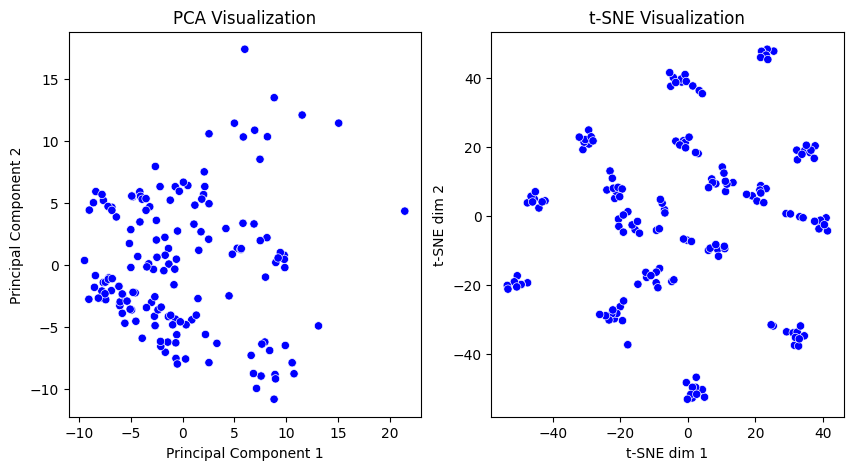

In [10]:
import os
import seaborn as sns
from skimage import io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

# Define color map for subjects
# subject_color_map = {
#     'subject01': 'b',  # Blue
#     'subject02': 'g',  # Green
#     'subject03': 'r',  # Red
#     'subject04': 'c',  # Cyan
#     'subject05': 'm',  # Magenta
#     'subject06': 'y',  # Yellow
#     'subject07': 'k',  # Black
#     'subject08': 'tab:orange',  # Orange
#     'subject09': 'tab:brown',   # Brown
#     'subject10': 'tab:pink',    # Pink
#     'subject11': 'tab:gray',    # Gray
#     'subject12': 'tab:olive',   # Olive
#     'subject13': 'tab:cyan',    # Cyan
#     'subject14': 'tab:purple',  # Purple
#     'subject15': 'tab:blue'     # Light Blue
# }

# all of these have same color cause we dont know about number of subject and labels :)
subject_color_map = {
    'subject01': 'b',
    'subject02': 'b',
    'subject03': 'b',
    'subject04': 'b',
    'subject05': 'b',
    'subject06': 'b',
    'subject07': 'b',
    'subject08': 'b',
    'subject09': 'b',
    'subject10': 'b',
    'subject11': 'b',
    'subject12': 'b',
    'subject13': 'b',
    'subject14': 'b',
    'subject15': 'b',
}

# Load images
image_folder = path
image_files = os.listdir(image_folder)

# Preprocess images and extract features
images = []
subjects = []
for image_file in image_files:
    subject, _ = image_file.split('.', 1)  # Extract subject from filename
    subjects.append(subject)
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Flatten image to create feature vector
    images.append(image.flatten())

# Convert list of images to numpy array
data = np.array(images)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feat)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42) 
tsne_result = tsne.fit_transform(feat)

# Create a DataFrame for PCA result
df_pca = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Subject'] = subjects

# Create a DataFrame for t-SNE result
df_tsne = pd.DataFrame(tsne_result, columns=['t-SNE dim 1', 't-SNE dim 2'])
df_tsne['Subject'] = subjects

# Plot PCA result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Subject', palette=subject_color_map, legend=False) #turn True legend for show subject table guide
plt.title('PCA Visualization')

# Plot t-SNE result
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tsne, x='t-SNE dim 1', y='t-SNE dim 2', hue='Subject', palette=subject_color_map, legend=False)
plt.title('t-SNE Visualization')

plt.show()


Due to above plot, we think t-SNE plotting is better than PCA. and the cluster number is around 17. cause we have 17 node of datas.
We can use K-Means via K = 17 and due to result, change the K.

# Phase 3

### K-Means

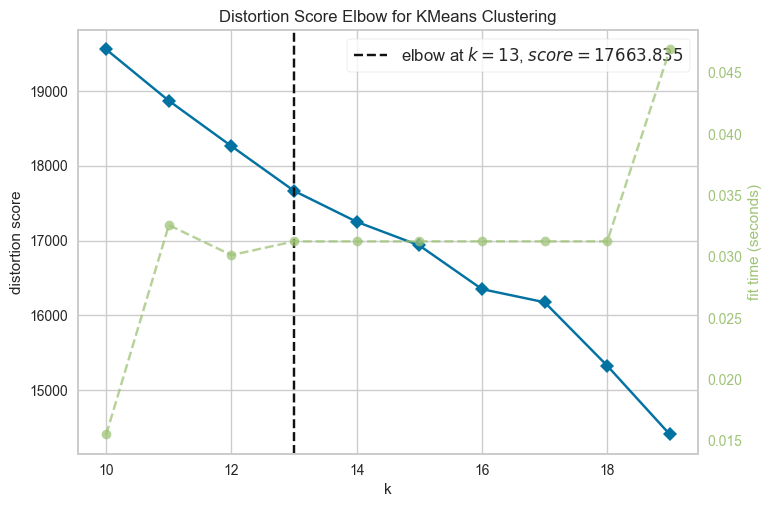

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Initialize KMeans model
kmeans = KMeans(random_state=42)
kmeans.fit(feat)

# Instantiate the KElbowVisualizer with the KMeans model
visualizer = KElbowVisualizer(kmeans, k=(10,20))

# Fit the data and visualize the elbow method
visualizer.fit(feat)
visualizer.show()


Images saved successfully.


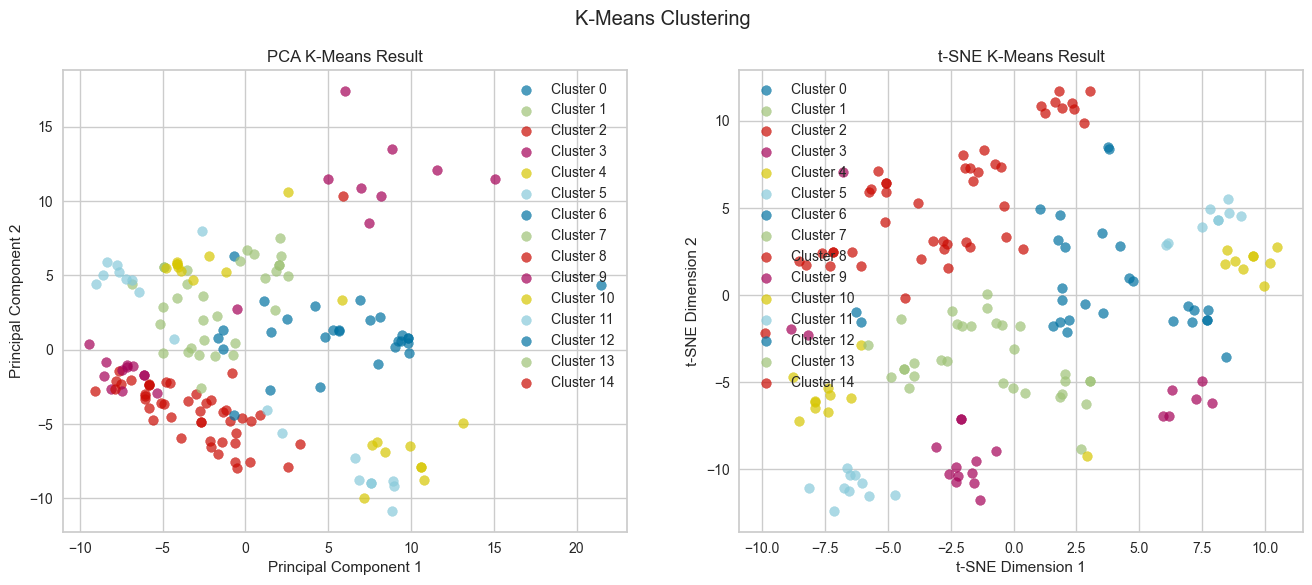

In [12]:
import shutil

clusterNum = 15

kmeans = KMeans(n_clusters=clusterNum, random_state=42)
kmeans.fit(feat)
predicted_labels = kmeans.labels_

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# Create a folder to save the images
if AliPC:
    output_folder = f"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\output\\K-Means-with-K-{clusterNum}\\"
else:
    output_folder = "/content/drive/MyDrive/output/K-Means-with-K-{clusterNum}/"

os.makedirs(output_folder, exist_ok=True)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames, kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
    groups[cluster].append(file)

# Save the images
for cluster_id, images in groups.items():
    cluster_folder = os.path.join(output_folder, f"cluster_{cluster_id}")
    os.makedirs(cluster_folder, exist_ok=True)
    for image_file in images:
        shutil.copy(image_file, cluster_folder)
print("Images saved successfully.")


# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE for visualization
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot both PCA and t-SNE
plt.figure(figsize=(16, 6))

# Plot PCA
plt.subplot(1, 2, 1)
for cluster_label in set(predicted_labels):
    cluster_indices = predicted_labels == cluster_label
    plt.scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], label=f'Cluster {cluster_label}', alpha=0.7)
plt.title('PCA K-Means Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for cluster_label in set(predicted_labels):
    cluster_indices = predicted_labels == cluster_label
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], label=f'Cluster {cluster_label}', alpha=0.7)
plt.title('t-SNE K-Means Result')
plt.suptitle("K-Means Clustering")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

plt.show()


# DBSCAN

In [13]:
# Perform DBSCAN clustering
import shutil
from skimage import io
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from collections import defaultdict
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

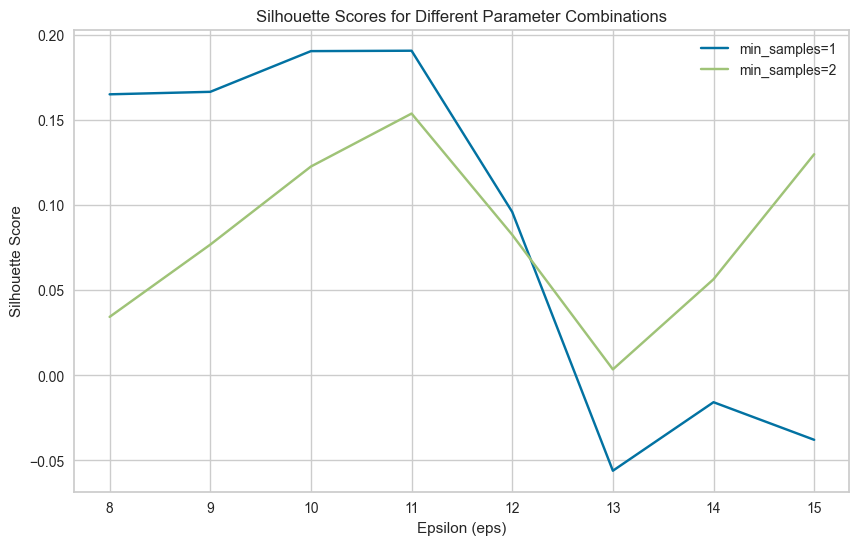

In [14]:
# Define a range of parameter values to explore
eps_values = np.linspace(8, 15, 8)  # Adjust the range as needed
min_samples_values = range(1, 3)  # Adjust the range as needed

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        # Compute silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

# Reshape silhouette scores into a 2D array
silhouette_scores = np.array(silhouette_scores).reshape(len(eps_values), len(min_samples_values))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
for i, min_samples in enumerate(min_samples_values):
    plt.plot(eps_values, silhouette_scores[:, i], label=f"min_samples={min_samples}")
plt.title("Silhouette Scores for Different Parameter Combinations")
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()


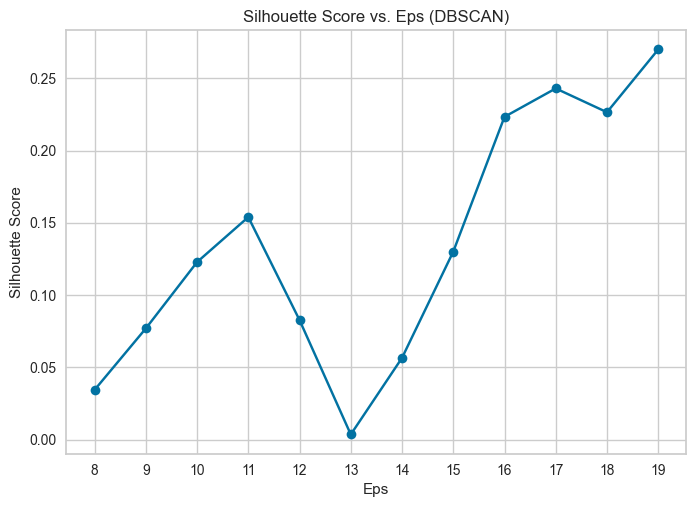

In [15]:
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
min_samples = 2
StartRange=8
FinishRange=20
for eps in range(StartRange, FinishRange):  # Try different values of eps
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    if dbscan.labels_.size > 0:
        silhouette_avg = silhouette_score(X, dbscan.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different values of eps
import matplotlib.pyplot as plt

plt.plot(range(StartRange, FinishRange), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Eps (DBSCAN)")
plt.xlabel("Eps")
plt.ylabel("Silhouette Score")
plt.xticks(range(StartRange, FinishRange))
plt.grid(True)
plt.show()

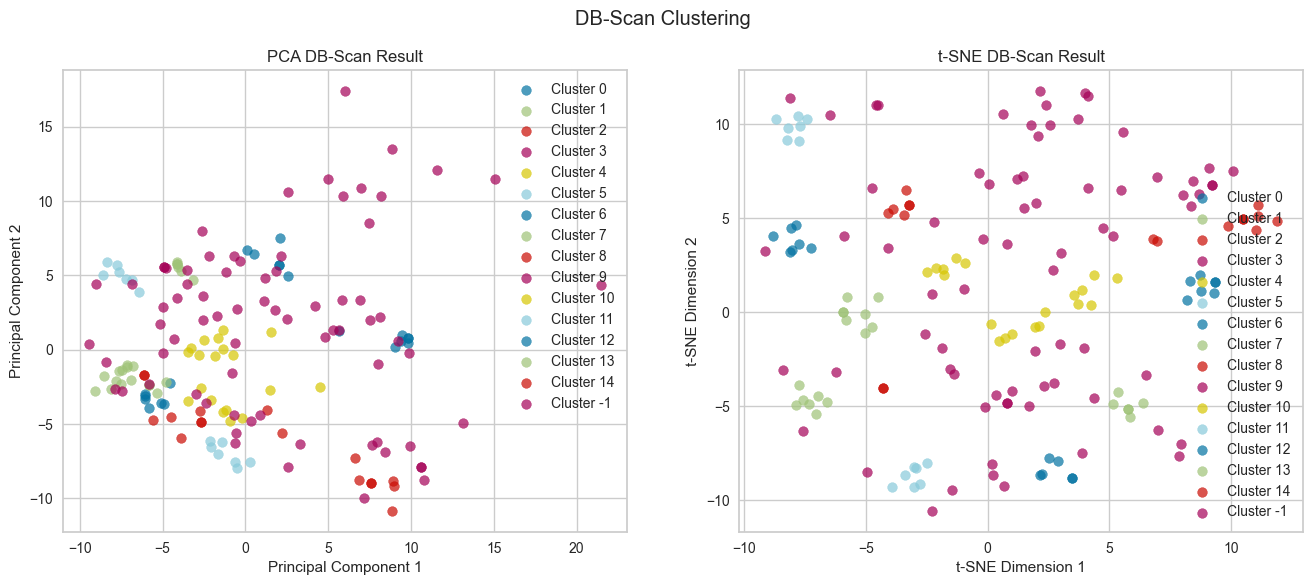

In [16]:
eps = 11 # Adjust as needed
min_samples = 2 # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
predicted_labels = dbscan.fit_predict(X)
# print(cluster_labels)

# Preprocess filenames to extract labels
labels = [int(filename.split('.')[0].split('subject')[1]) for filename in image_files]

# Create a folder to save the images
if AliPC:
    cluster_output_dir = f"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\output\\DB-SCAN-with-eps-{eps}-min-{min_samples}\\"
else:
    cluster_output_dir = "/content/drive/MyDrive/output/DB-SCAN-with-eps-{eps}-min-{min_samples}/"

os.makedirs(cluster_output_dir, exist_ok=True)

# Move images to cluster-specific folders
for i, cluster_label in enumerate(predicted_labels):
    cluster_dir = os.path.join(cluster_output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    filename = os.listdir(path)[i]
    shutil.copy(os.path.join(path, filename), cluster_dir)

# Mapping cluster labels to actual labels based on majority vote
label_mapping = defaultdict(lambda: defaultdict(int))
for cluster_label, true_label in zip(predicted_labels, labels):
    label_mapping[cluster_label][true_label] += 1

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE for visualization
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot both PCA and t-SNE
plt.figure(figsize=(16, 6))

# Plot PCA
plt.subplot(1, 2, 1)
for cluster_label in set(predicted_labels):
    cluster_indices = predicted_labels == cluster_label
    plt.scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], label=f'Cluster {cluster_label}', alpha=0.7)
plt.title('PCA DB-Scan Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for cluster_label in set(predicted_labels):
    cluster_indices = predicted_labels == cluster_label
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], label=f'Cluster {cluster_label}', alpha=0.7)
plt.title('t-SNE DB-Scan Result')
plt.suptitle("DB-Scan Clustering")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

plt.show()

# Agglomarative

Silhouette Score: 0.19698605


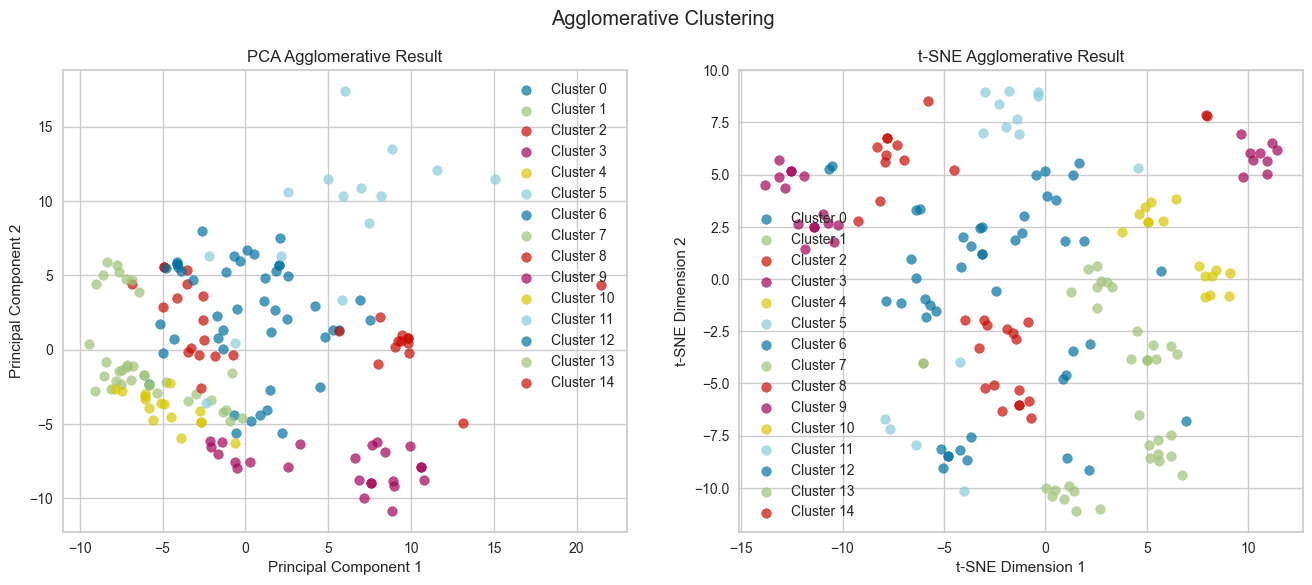

In [17]:
from sklearn.cluster import AgglomerativeClustering


# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

n_clusters = 15  # Adjust as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
predicted_labels = agglomerative.fit_predict(X)

clusteringMethod = "Agglomerative"

# Compute silhouette score
silhouette_avg = silhouette_score(X, predicted_labels)
print("Silhouette Score:", silhouette_avg)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE for visualization
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot both PCA and t-SNE
plt.figure(figsize=(16, 6))

# Plot PCA
plt.subplot(1, 2, 1)
for cluster_label in set(predicted_labels):
    cluster_indices = predicted_labels == cluster_label
    plt.scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], label=f'Cluster {cluster_label}', alpha=0.7)
plt.title('PCA Agglomerative Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE
plt.subplot(1, 2, 2)
for cluster_label in set(predicted_labels):
    cluster_indices = predicted_labels == cluster_label
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], label=f'Cluster {cluster_label}', alpha=0.7)
plt.title('t-SNE Agglomerative Result')
plt.suptitle("Agglomerative Clustering")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

plt.show()

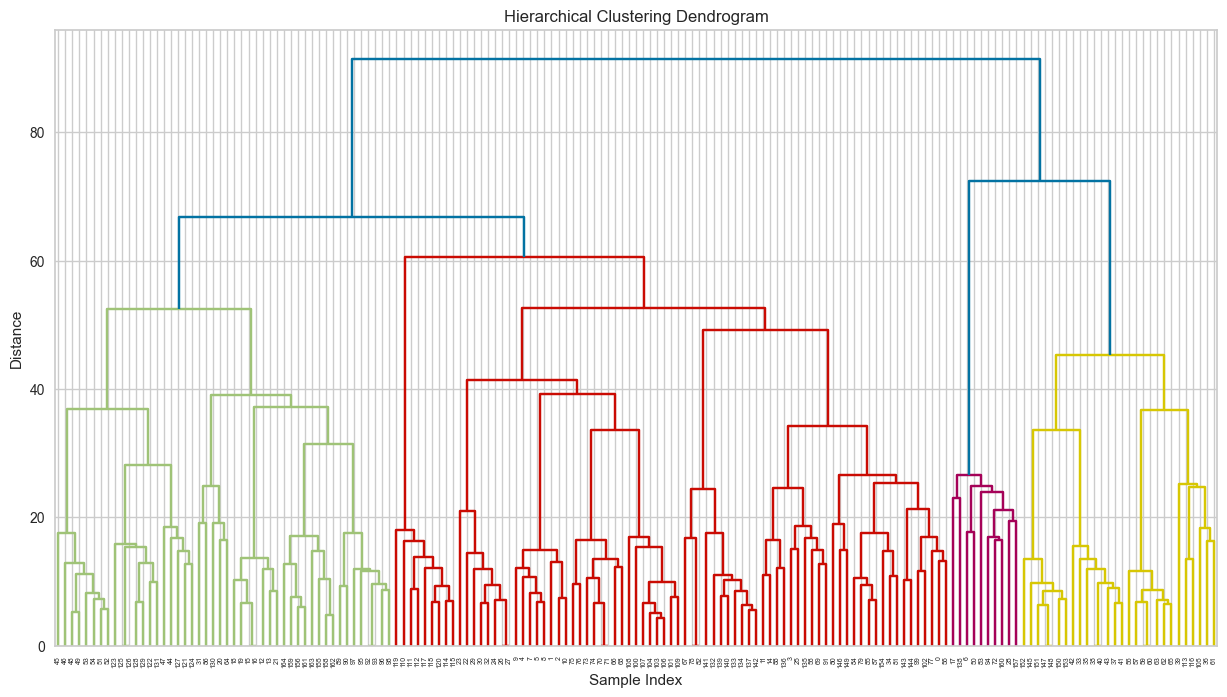

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Reshape X to 2D array
num_samples = X.shape[0]
num_features = np.prod(X.shape[1:])
X = X.reshape(num_samples, num_features)

# Calculate linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Phase 4 (Rand Index)

In [19]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(feat)
predicted_labels = kmeans.labels_

clusteringMethod = "K-Means"

In [20]:
# Perform DB-Scan clustering
eps = 11
min_samples = 1
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)
predicted_labels = cluster_labels

clusteringMethod = "DB-Scan"

### Our Rand-Index Implementation

Our Rand-Index: 0.9584626755358463


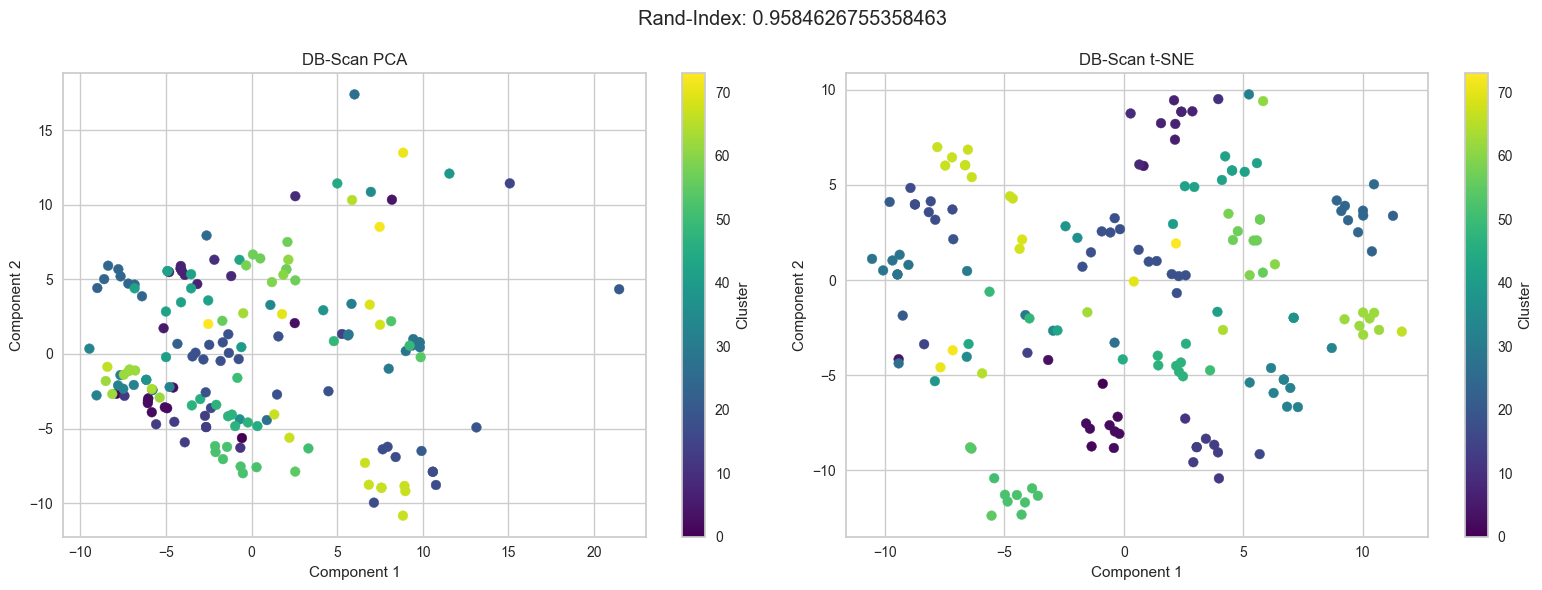

In [21]:
def rand_index_method(labels_true, labels_pred):
    tp = fp = tn = fn = 0
    n = len(labels_true)
    for i in range(n):
        for j in range(i+1, n):
            if labels_true[i] == labels_true[j] and labels_pred[i] == labels_pred[j]:
                tp += 1
            elif labels_true[i] != labels_true[j] and labels_pred[i] != labels_pred[j]:
                tn += 1
            elif labels_true[i] == labels_true[j] and labels_pred[i] != labels_pred[j]:
                fn += 1
            else:
                fp += 1
    result = (tp + tn)/(tp + tn + fp + fn)
    return result

# print(labels, predicted_labels)

image_files = os.listdir(path)

# Preprocess filenames to extract labels
labels = [int(filename.split('.')[0].split('subject')[1]) for filename in image_files]

# Get the true labels and predicted labels
true_labels = labels

rand_index = rand_index_method(true_labels, predicted_labels)

print("Our Rand-Index:",rand_index)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # You can adjust the number of components
pca_result = pca.fit_transform(feat)

# Apply t-SNE on the PCA result
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(feat)

# Plot the clusters
plt.figure(figsize=(16, 6))

# Plot PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=predicted_labels, cmap='viridis')
plt.title(f'{clusteringMethod} PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=predicted_labels, cmap='viridis')
plt.title(f'{clusteringMethod} t-SNE')
plt.suptitle(f"Rand-Index: {rand_index}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import rand_score

# Load images
image_files = os.listdir(path)

# Preprocess filenames to extract labels
true_labels = [int(filename.split('.')[0].split('subject')[1]) for filename in image_files]

# print("labels:\n",labels)

# print("\npredicted_labels:\n",predicted_labels)

# Calculate the Rand-Index
rand_index = rand_score(true_labels, predicted_labels)
print(f"Implemented Rand-Index for {clusteringMethod}:{rand_index}")

Implemented Rand-Index for DB-Scan:0.9584626755358463
